## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 8.13: optical image of multiple supernova remnants in the N44 nebula in the Large Magellanic Cloud

#### data from skyview (DSS2 red)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
%matplotlib inline

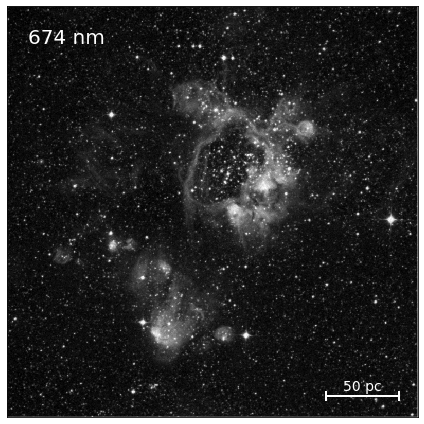

In [2]:
fig = plt.figure(figsize=(6,6))

hdu = fits.open('N44_DSS2_red.fits')
wcs1 = WCS(hdu[0])
ax1 = fig.add_subplot(111, projection=wcs1)
im1 = hdu[0].data
hd1 = hdu[0].header
#print(im1.min(),im1.max())

imin, imax = 20, 820
jmin, jmax = 30, 830

ax1.imshow(im1[imin:imax, jmin:jmax], cmap='gray', origin='lower', vmin=2000, vmax=23000)
hdu.close()

# scale bar
ax1.set_xlim(0,imax-imin-1)
ax1.set_ylim(0,jmax-jmin-1)
dx = hd1['CDELT1']
# 0.0004 deg = 1.4 arcsec per pixel = 0.349 pc at 50 kpc
xbar = 143.2
x0 = 620
x1 = x0 + xbar
y0 = 40
dy = 8
ax1.plot([x0,x1],[y0,y0], 'w-', lw=2)
ax1.plot([x0,x0],[y0-dy,y0+dy], 'w-', lw=2)
ax1.plot([x1,x1],[y0-dy,y0+dy], 'w-', lw=2)
ax1.text(0.5*(x0+x1), y0+1.5*dy, '50 pc', color='white', fontsize=14, ha='center')

for i in (0,1):
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_axislabel('')
    ax1.coords[i].set_axislabel('')
ax1.text(0.05, 0.91, '674 nm', {'color': 'white', 'fontsize': 20}, transform=ax1.transAxes)

fig.tight_layout()
plt.savefig('N44.pdf')